<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Predict_score/24052021_visualize_scatter_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Cài các công cụ cần thiết và tải file dữ liệu**

In [ ]:
!sudo apt install sqlite3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 752 kB of archives.
After this operation, 2,482 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 sqlite3 amd64 3.22.0-1ubuntu0.4 [752 kB]
Fetched 752 kB in 1s (1,208 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf:

In [ ]:
# DOWLOAD WECODE.CSV VÀ SCORE_TRAIN.CSV
!gdown --id 1Otyf4okdrqXiGhUHOOldq-uj_WnX-LFx
!gdown --id 1i5q2-xC39eSReAIgTUNhFTdm7UIMHA8_

Downloading...
From: https://drive.google.com/uc?id=1Otyf4okdrqXiGhUHOOldq-uj_WnX-LFx
To: /content/score_training.csv
100% 23.9k/23.9k [00:00<00:00, 3.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i5q2-xC39eSReAIgTUNhFTdm7UIMHA8_
To: /content/wecode.csv
30.8MB [00:00, 84.5MB/s]


In [ ]:
# ĐẾM SỐ DÒNG CỦA CÁC FILE CSV
!wc -l < wecode.csv
!wc -l < score_training.csv

264607
976


#**2. Tiền xử lý file csv**

##**2.1. File score_traning.csv**

In [ ]:
# IMPORT CÁC THƯ VIỆN CẦN THIẾT
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# VIEW 20 DÒNG ĐẦU CỦA FILE score_training.csv
score = pd.read_csv('/content/score_training.csv')
score.head(20)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [ ]:
# ĐẾM SỐ LƯỢNG DỮ LIỆU MÀ HÀNG CK BỊ THIẾU
score = pd.read_csv('/content/score_training.csv').values
data = score[:, 4].reshape(-1, 1)

i = 0
sum = 0
while i < len(data):
  if data[i] == '\xa0' or math.isnan(data[i]):
    # print(i + 1)
    sum += 1
  i += 1
print(f"Mat {sum} tren tong so {len(data)} diem du lieu, chiem: {(sum / len(data) * 100):.4f}%")

Mat 55 tren tong so 975 diem du lieu, chiem: 5.6410%


In [ ]:
# XÓA DÒNG 21 DO NÓ KHÔNG CÓ DỮ LIỆU
!sed -i '21d' score_training.csv

# THAY TẤT CẢ CÁC KHOẢNG TRẮNG BẰNG NULL
!sed -i 's/ /NULL/g' score_training.csv

# THAY CÁC GIÁ TRỊ NAN CÒN LẠI THÀNH NULL
!sed -i 's/,,/,NULL,/g' score_training.csv

##**2.2. File wecode.csv**

In [ ]:
# VIEW FILE wecode.csv
wecode = pd.read_csv('/content/wecode.csv')
wecode.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


#**3. Tạo file sql dùng cho việc tạo database**

In [ ]:
# TẠO FILE Create_Database.sql VÀ GHI NỘI DUNG SAU VÀO FILE ĐÓ.
%%writefile Create_Database.sql

-- # Bảng WECODE lưu dự liệu của file wecode.csv.
CREATE TABLE WECODE (
    id INTEGER PRIMARY KEY, 
    assignment_id INTEGER,
    problem_id INTEGER,
    user_id INTEGER,
    is_final INTEGER,
    status TEXT,
    pre_score INTEGER,
    coefficient INTEGER,
    file_name TEXT,
    language_id INTEGER,
    created_at TEXT,
    updated_at TEXT
    );

-- # Bảng SCORE lưu dữ liệu của file score_training.csv.
CREATE TABLE SCORE (
    id INTEGER PRIMARY KEY,
    QT FLOAT,
    GK FLOAT,
    TH FLOAT,
    CK FLOAT,
    TBM FLOAT,
    TBTL FLOAT
    );

Writing Create_Database.sql


In [ ]:
# CODE NÀY DÙNG ĐỂ TẠO CÁC CÂU TRUY VẦN DÙNG CHO VIỆC TẠO DATABASE, CÁC CÂU TRUY VẤN NÀY ĐƯỢC GHI TIẾP (KHÔNG GHI ĐÈ) VÀO FILE Create_Database.sql

%%writefile Create_sql_files.cpp
#include <fstream>  // std::ofstream, std::ifstream
#include <string>   // std::string, getline

void make_sql_file(const std::string& input_file_path, int&& num_lines, const char* table_name) {
    std::ofstream ofs;
    std::ifstream ifs;
    ofs.open("Create_Database.sql", std::ios::app);
    ifs.open(input_file_path);
    std::string data;

    // # bỏ qua dòng đầu tiên trong input file
    getline(ifs, data);

    int mod_lines = num_lines % 1000;
    num_lines -= mod_lines;

    // # Lặp cho đến khi số dòng còn lại của input file ít hơn 1000
    for (int i = 0; i < num_lines; ++i) {
        // # INSERT INTO "table_name" VALUES ("data"), ...;
        ofs << "\nINSERT INTO " << table_name <<" VALUES ";
        // # Một dòng insert sẽ có 1000 record
        int LIMIT = i + 999;
        while (i xor LIMIT) {
            getline(ifs, data);
            ofs << "(" << data << "), ";
            ++i;
        }
        getline(ifs, data);
        ofs << "(" << data << ");";
    }

    // # Điền tất cả số hàng còn lại trong input file vào 1 hàng insert
    if (mod_lines) {
        // # INSERT INTO "table_name" VALUES ("data"), ...;
        ofs << "\nINSERT INTO " << table_name <<" VALUES ";
        for (int i = 1; i < mod_lines; ++i) {
            getline(ifs, data);
            ofs << "(" << data << "), ";
        }
        getline(ifs, data);
        ofs << "(" << data << ");\n";
    }
    ifs.close();
    ofs.close();
}

int main(int argc, char **argv)
{
    // # Viết lệnh sql cho bảng WECODE
    make_sql_file("wecode.csv", int(std::stoi(argv[1]) - 1), "WECODE");
    // # Viết lệnh sql cho bảng SCORE
    make_sql_file("score_training.csv", int(std::stoi(argv[2]) - 1), "SCORE");
    return 0;
}

Writing Create_sql_files.cpp


In [ ]:
# BUILD Create_sql_files.cpp, RUN
!g++ Create_sql_files.cpp -o Create_sql_files && ./Create_sql_files `wc -l < wecode.csv` `wc -l < score_training.csv`

# XÓA FILE THỰC THI
!rm -f Create_sql_files

In [ ]:
# TẠO DATABASE
!rm -f database.db
!sqlite3 database.db < ./Create_Database.sql

# # ĐẾM SỐ LƯỢNG RECORD CÓ TRONG TABLE SCORE ĐÓ
!sqlite3 database.db "SELECT COUNT(*) FROM SCORE;"

# ĐẾM SỐ LƯỢNG RECORD CÓ TRONG TABLE WECODE ĐÓ
!sqlite3 database.db "SELECT COUNT(*) FROM WECODE;"

974
264606


#**4. Trích xuất các thông tin cần thiết từ database**

##**4.1. Tiền truy vấn để xác định sơ lược số recordrecord**

In [ ]:
# ĐỔI pre_score THÀNH ĐƠN VỊ %
!sqlite3 database.db "UPDATE WECODE SET pre_score = pre_score / 100;"

In [ ]:
%%writefile query.sql
-- # 1159 user_id
SELECT COUNT(DISTINCT user_id) FROM WECODE;

-- # 974 user_id
SELECT COUNT(DISTINCT id) FROM SCORE;

Writing query.sql


In [ ]:
!sqlite3 database.db <./query.sql

1159
974


##**4.2. Tạo bảng NUM_PROBLEMS để lưu số  problem mà các user đã làm (hoàn thành lẫn không hoàn thành)**

In [ ]:
%%writefile query.sql
-- # Dem so problem_id ma cac user da lam
-- DROP TABLE NUM_PROBLEMS;

CREATE TABLE NUM_PROBLEMS (
    user_id PRIMARY KEY,
    num_problems INTEGER NOT NULL
);

INSERT INTO NUM_PROBLEMS
    SELECT user_id, COUNT(DISTINCT problem_id) as num_problems
    FROM WECODE
    GROUP BY user_id

Overwriting query.sql


In [ ]:
!sqlite3 database.db <./query.sql

##**4.3. Tạo bảng NUM_TRUE_PROBLEMS để lưu số problem mà user đã làm đúng**

In [ ]:
%%writefile query.sql
-- # Dem so problem_id ma cac user lam dung
-- DROP TABLE  NUM_TRUE_PROBLEMS;

CREATE TABLE NUM_TRUE_PROBLEMS (
    user_id PRIMARY KEY,
    num_true_problems INTEGER NOT NULL
);

INSERT INTO NUM_TRUE_PROBLEMS
    SELECT USER_ID_TABLE.user_id, IFNULL(num_true_problems, 0)
    FROM (
        SELECT DISTINCT user_id
        FROM WECODE
    ) AS USER_ID_TABLE
    LEFT JOIN (
        SELECT user_id, COUNT(DISTINCT problem_id) as num_true_problems
        FROM WECODE
        WHERE pre_score >= 100
        GROUP BY user_id
    ) AS TRUE_PROBLEMS_TABLE
    ON USER_ID_TABLE.user_id = TRUE_PROBLEMS_TABLE.user_id

Overwriting query.sql


In [ ]:
!sqlite3 database.db <./query.sql

##**4.4. Tạo bảng NUM_SUBMITIONS để lưu số lần submit của từng user**

In [ ]:
%%writefile query.sql
-- # Dem so lan submit cua cac user
-- DROP TABLE NUM_SUBMITIONS;

CREATE TABLE NUM_SUBMITIONS (
    user_id PRIMARY KEY,
    num_submitions INTEGER NOT NULL
);

INSERT INTO NUM_SUBMITIONS
    SELECT user_id, COUNT(problem_id) as num_submitions
    FROM WECODE
    GROUP BY user_id

Overwriting query.sql


In [ ]:
!sqlite3 database.db <./query.sql

##**4.5. Tạo bảng TRAINING_TABLE để gộp thông tin của 3 bảng trên lại để tạo thành 1 bảng chứa dữ liệu train**

In [ ]:
%%writefile query.sql
-- DROP TABLE TRAINING_TABLE;

-- # Bảng TRAINING_TABLE lưu các dữ liệu cần cho việc huấn luyện mô hình.
-- # Dữ liệu của bảng này được lấy từ 2 bảng WECODE và SCORE.
CREATE TABLE TRAINING_TABLE (
    user_id INTEGER PRIMARY KEY,
    num_problems INTEGER NOT NULL,
    num_submitions INTEGER NOT NULL,
    num_true_problems INTEGER NOT NULL,
    CK FLOAT NOT NULL
);

INSERT INTO TRAINING_TABLE
    SELECT NUM_PROBLEMS.user_id as user_id,   --# user_id
        num_problems,                         --# num_problems
        num_submitions,                       --# num_submitions
        num_true_problems,                    --# num_true_problems
        CK                                    --# CK
      
    FROM NUM_PROBLEMS, NUM_TRUE_PROBLEMS, NUM_SUBMITIONS, SCORE

    WHERE (NUM_PROBLEMS.user_id = NUM_TRUE_PROBLEMS.user_id)
          and (NUM_PROBLEMS.user_id = NUM_SUBMITIONS.user_id)
          and (NUM_PROBLEMS.user_id = SCORE.id) and (SCORE.CK IS NOT NULL)

Overwriting query.sql


In [ ]:
!sqlite3 database.db <./query.sql

##**4.6. Kiểm tra lại kết quả sau khi gộp bảng**

In [ ]:
!sqlite3 database.db "select COUNT(DISTINCT user_id) from WECODE, SCORE WHERE (SCORE.id = user_id) and (CK IS NOT NULL)"
!sqlite3 database.db "SELECT COUNT(*) FROM TRAINING_TABLE"

806
806


In [ ]:
%%writefile query.sql
--# Truy vấn các record còn thiếu trong bảng TRAINING_TABLE
SELECT DISTINCT WECODE.user_id
FROM WECODE, SCORE, TRAINING_TABLE
WHERE (SCORE.id = WECODE.user_id)
      and (SCORE.CK IS NOT NULL)
      and WECODE.user_id NOT IN (
          SELECT user_id FROM TRAINING_TABLE
      )

Overwriting query.sql


In [ ]:
!sqlite3 database.db <./query.sql

##**4.7. Lưu bảng TRAINING_TABLE thành file csv**

In [ ]:
!sqlite3 -header -csv database.db "SELECT * FROM TRAINING_TABLE" > training_data.csv

#**5. Vẽ tương quan tỉ lệ**

In [ ]:
prob_dung = pd.read_csv("training_data.csv", usecols=['num_true_problems']).values
prob = pd.read_csv("training_data.csv", usecols=['num_problems']).values
submitions = pd.read_csv("training_data.csv", usecols=['num_submitions']).values
CK = pd.read_csv("training_data.csv", usecols=['CK']).values
W = 20
H = 8

<function matplotlib.pyplot.show>

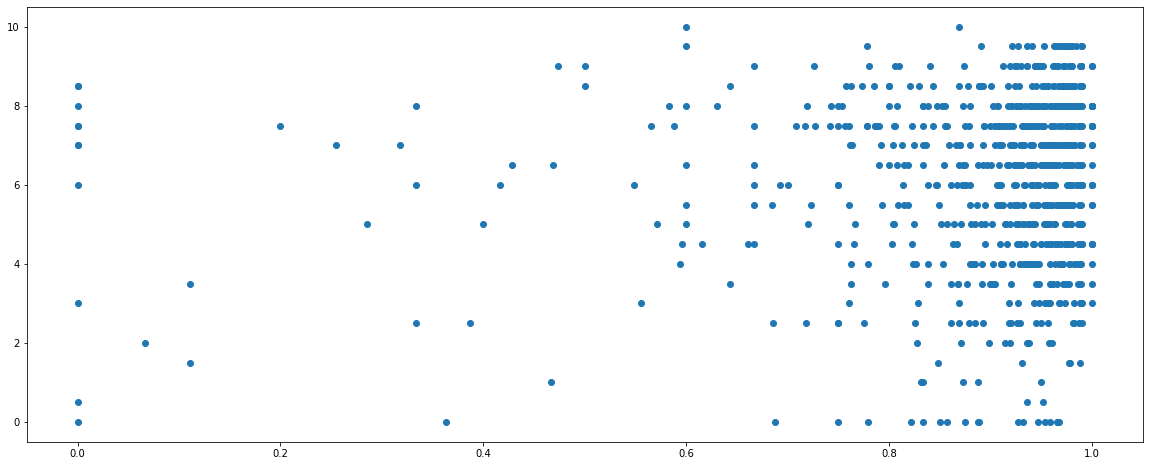

In [ ]:
# 1) Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
X = []
i = 0;
while i < len(prob):
  X.append(prob_dung[i] / prob[i])
  i += 1

Y = CK
plt.figure(figsize=(W, H))
plt.scatter(X, Y)
# plt.plot(X, Y)
plt.show

<function matplotlib.pyplot.show>

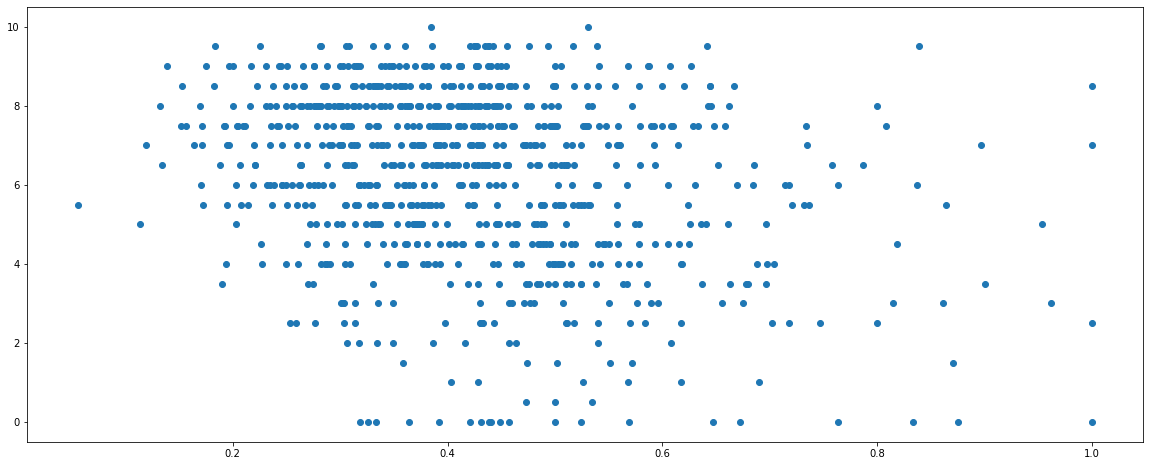

In [ ]:
# 2) Tổng số problem đã sumbit / Tổng số submissions 
X = []
i = 0;
while i < len(prob):
  X.append(prob[i] / submitions[i])
  i += 1

Y = CK
plt.figure(figsize=(W, H))
plt.scatter(X, Y)
# plt.plot(X, Y)
plt.show

<function matplotlib.pyplot.show>

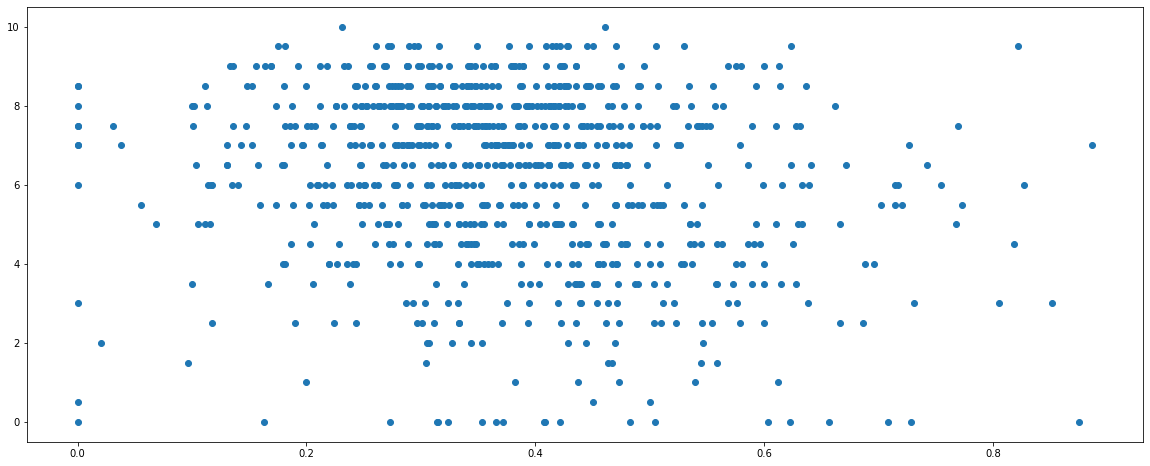

In [ ]:
# 3) Số lần submit đúng (pre_score=10000) / tổng số submissions 
X = []
i = 0;
while i < len(prob):
  X.append(prob_dung[i] / submitions[i])
  i += 1

Y = CK
plt.figure(figsize=(W, H))
plt.scatter(X, Y)
# plt.plot(X, Y)
plt.show

<function matplotlib.pyplot.show>

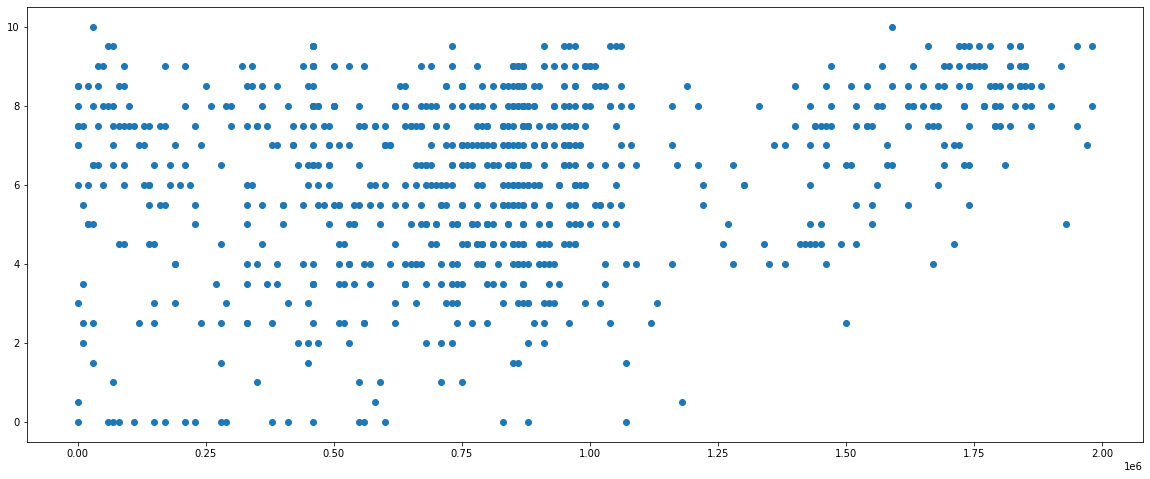

In [ ]:
# 4) Tổng pre_score của các submssion có is_final = 1 
X = []
i = 0;
while i < len(prob):
  X.append(prob_dung[i] * 10000)
  i += 1

Y = CK
plt.figure(figsize=(W, H))
plt.scatter(X, Y)
# plt.plot(X, Y)
plt.show